## Observations and Insights 

1. Capomulin and Ramicane appear to be better performing drugs compared to the others. This is shown from the mean tumor volume being smaller than the others.
2. There is a positive correlation between the weight of the mice and tumour size, meaning the heavier the mouse, the larger the volume of the tumour. 
3. There is almost the same number of male mice as female mice with just a few more male than female.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "./data/Mouse_metadata.csv"
study_results_path = "./data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Checking the number of mice.
mouse_num = data['Mouse ID'].unique()
len(mouse_num)

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = data.loc[(data['Mouse ID'] == 'g989')]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [59]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = data.loc[data['Mouse ID'] != 'g989']
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = new_data['Mouse ID'].unique()
len(new_mice_number)

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_mean = new_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_median = new_data.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_var = new_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_sigma = new_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sem = new_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']


summary = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_var, 
                        'Standard Deviation': tumor_sigma,'SEM': tumor_sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary2 = new_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

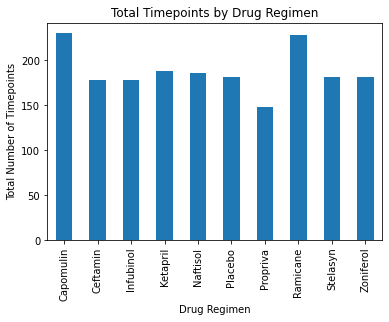

In [61]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timepoints = new_data.groupby(['Drug Regimen'])['Timepoint'].count()
timepoints.plot(kind='bar', ylabel='Total Number of Timepoints', title='Total Timepoints by Drug Regimen')
plt.show()


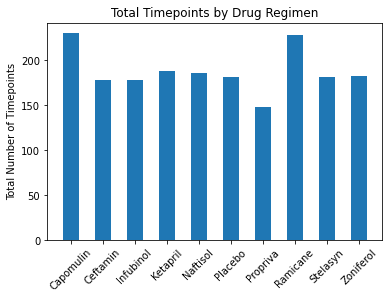

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
           'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
timepoints_list = (new_data.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
plt.xticks(rotation=45)
plt.bar(labels, timepoints_list, 0.5)
plt.ylabel('Total Number of Timepoints')
plt.title('Total Timepoints by Drug Regimen')
plt.show()

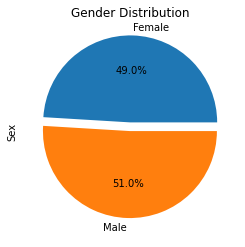

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = new_data.groupby(['Sex'])['Sex'].count()
gender_pie_plot = gender.plot(kind='pie', y='Mouse ID', title='Gender Distribution', autopct='%1.1f%%', explode=(0.1, 0))
plt.show()

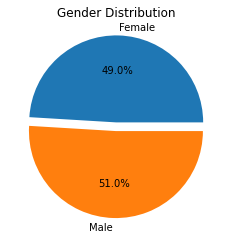

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels2 = ['Female', 'Male']
plt.pie(gender, labels=labels2, explode=(0.1,0), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

final_volume = new_data.groupby(['Mouse ID'])['Timepoint'].max()
final_volume_df = pd.DataFrame(final_volume)
final_volume_df = pd.merge(new_data, final_volume_df, on=('Mouse ID','Timepoint'), how='right')
final_volume_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [16]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

capomulin_t = []
ramicane_t = []
infubinol_t = []
ceftamin_t = []

# Put treatments into a list for for loop (and later for plot labels)

for index, row in final_volume_df.iterrows():
        if row["Drug Regimen"] == treatments[0]:
            capomulin_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[1]:
            ramicane_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[2]:
            infubinol_t.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[3]:
            ceftamin_t.append(row['Tumor Volume (mm3)'])

drugs_df = pd.DataFrame({treatments[0]: capomulin_t,
                       treatments[1]: ramicane_t,
                       treatments[2]: infubinol_t,
                       treatments[3]: ceftamin_t
                       })


drugs_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [73]:
# Calculating and printing the quartiles and IQR

final_tumor_vol = []

for drug in treatments:
    
    final_tumor_vol = new_data.loc[new_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    final_tumor_vol.append(final_tumor_vol)
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = round(quartiles[.25],2)
    upperq = round(quartiles[.75],2)
    mean = final_tumor_vol.mean()
    iqr = round(upperq-lowerq,2)  

    print(f"{drug} Regimen")
    print(f"The lower quartile of {drug} tumors is: {lowerq}")
    print(f"The upper quartile of {drug} tumors is: {upperq}")
    print(f"The interquartile range of {drug} tumors is: {iqr}")
    print('-'*60) 
  


Capomulin Regimen
The lower quartile of Capomulin tumors is: 37.69
The upper quartile of Capomulin tumors is: 45.0
The interquartile range of Capomulin tumors is: 7.31
------------------------------------------------------------
Ramicane Regimen
The lower quartile of Ramicane tumors is: 36.67
The upper quartile of Ramicane tumors is: 45.0
The interquartile range of Ramicane tumors is: 8.33
------------------------------------------------------------
Infubinol Regimen
The lower quartile of Infubinol tumors is: 47.31
The upper quartile of Infubinol tumors is: 57.31
The interquartile range of Infubinol tumors is: 10.0
------------------------------------------------------------
Ceftamin Regimen
The lower quartile of Ceftamin tumors is: 47.21
The upper quartile of Ceftamin tumors is: 56.8
The interquartile range of Ceftamin tumors is: 9.59
------------------------------------------------------------


C:\Users\haldu\AppData\Local\Temp\ipykernel_44848\1828122951.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\haldu\AppData\Local\Temp\ipykernel_44848\1828122951.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\haldu\AppData\Local\Temp\ipykernel_44848\1828122951.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)
C:\Users\haldu\AppData\Local\Temp\ipykernel_44848\1828122951.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_vol.append(final_tumor_vol)


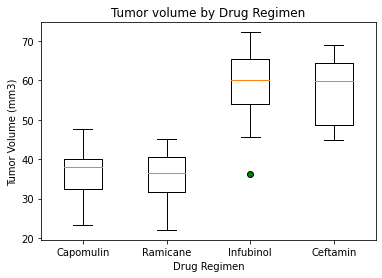

In [47]:
boxplot = [drugs_df[treatments[0]],
                drugs_df[treatments[1]],
                drugs_df[treatments[2]],
                drugs_df[treatments[3]]
               ]

fig, ax = plt.subplots()
ax.boxplot(boxplot, labels = treatments, flierprops = {"markerfacecolor": "green"})
ax.set_title('Tumor volume by Drug Regimen') 
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Volume (mm3)') 
plt.show()

## Line and Scatter Plots

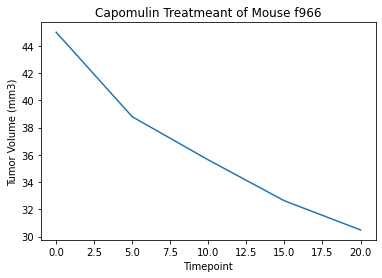

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df = new_data.loc[new_data['Mouse ID'] == 'f966']
x=capomulin_df['Timepoint']
y=capomulin_df['Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatmeant of Mouse f966')
plt.plot(x,y)
plt.show()

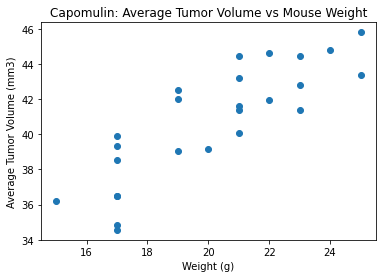

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df2 = new_data.loc[new_data['Drug Regimen'] == 'Capomulin']
capomulin_ave = capomulin_df2.groupby(['Mouse ID']).mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight')
plt.scatter(capomulin_ave['Weight (g)'], capomulin_ave['Tumor Volume (mm3)'])
plt.show()


## Correlation and Regression

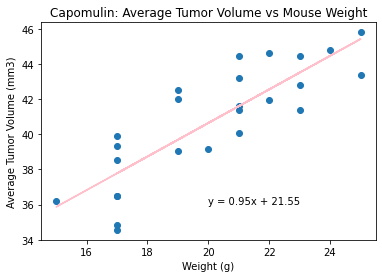

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = capomulin_ave['Weight (g)']
y_values = capomulin_ave['Tumor Volume (mm3)']
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
regress = x_values*slope + intercept

plt.scatter(x_values, y_values)
plt.plot(x_values, regress, color='pink')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin: Average Tumor Volume vs Mouse Weight')
plt.annotate(equation, (20,36))
plt.show()